# ✅ 阶段三：真实可行三角形结构展示

In [1]:

import numpy as np
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from algorithms.market import Market
from algorithms.passive_ps_max import passive_ps_max
from utils.market_generator import MarketGenerator
from utils.visualization import plot_surplus_triangle
from utils.visualization import plot_surplus_triangle_from_vertices
from utils.triangle_utils import compute_surplus_triangle, triangle_features
import matplotlib.pyplot as plt


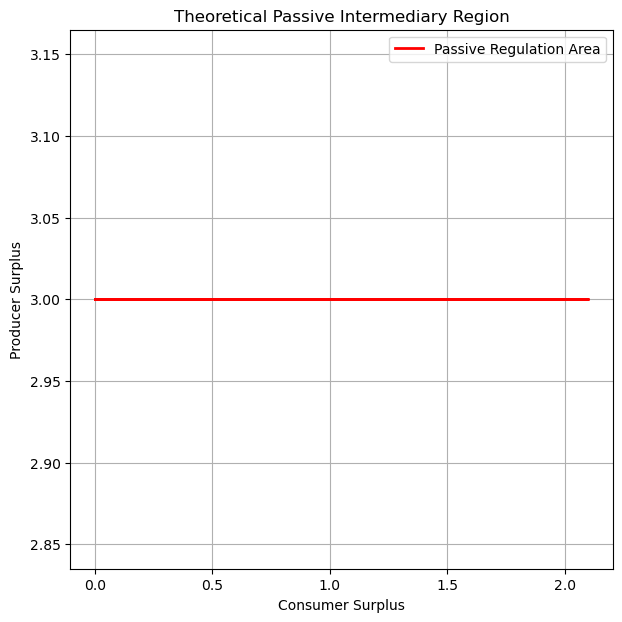

In [2]:
from utils.visualization import plot_passive_surplus_triangle_theory

values = [1, 4, 5, 10]
masses = [0.3, 0.2, 0.2, 0.3]
market = Market(values, masses)
F = [1, 4, 5, 10]

scheme = passive_ps_max(market, F)
plot_passive_surplus_triangle_theory(market, F, show_scheme=True, scheme=scheme)


## 示例 1：Geometric 分布
- 分布参数: q = 0.5
- 价格集: F = [2, 4]


Executing PassivePSMax algorithm:
Market: Market(values=[ 1  2  4  8 16], masses=[0.51612903 0.25806452 0.12903226 0.06451613 0.03225806])
Price set F: [2, 4]

Iteration 1:
Remaining market: Market(values=[ 1  2  4  8 16], masses=[0.51612903 0.25806452 0.12903226 0.06451613 0.03225806])
Selected optimal F price: 2
Support set: [1, 2, 8, 16]
Calculated gamma: 0.5806451612903226
Added segment with price 2
Remaining mass: 0.4193548387096774

Iteration 2:
Remaining market: Market(values=[ 1  2  4  8 16], masses=[0.25806452 0.         0.12903226 0.03225806 0.        ])
Selected optimal F price: 4
Support set: [1, 4, 8]
Calculated gamma: 0.2903225806451613
Added segment with price 4
Remaining mass: 0.12903225806451613

Iteration 3:
Remaining market: Market(values=[ 1  2  4  8 16], masses=[0.06451613 0.         0.06451613 0.         0.        ])
Selected optimal F price: 4
Support set: [1, 4]
Calculated gamma: 0.08602150537634408
Added segment with price 4
Remaining mass: 0.04301075268817204

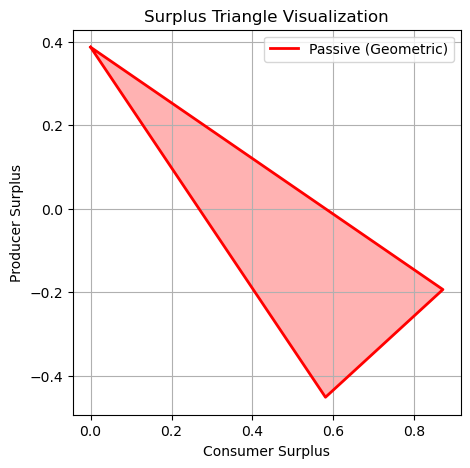

顶点坐标: [(0.0, 0.3870967741935485), (0.5806451612903225, -0.4516129032258063), (0.8709677419354838, -0.1935483870967742)]
面积: 0.19667013527575433
几何特征: {'edge_lengths': [1.0200895677962514, 0.3884385347997513, 1.0467729509411583], 'is_isoceles': False, 'area': 0.19667013527575433}


In [2]:

values, masses = MarketGenerator.geometric(q=0.5, n=5)
market = Market(values, masses)
F = [2, 4]

scheme = passive_ps_max(market, F, debug=True)
if scheme:
    vertices, area = compute_surplus_triangle(market, F, scheme)
    plt.figure(figsize=(5,5))
    plot_surplus_triangle_from_vertices(vertices, label="Passive (Geometric)", color="red")
    print("顶点坐标:", vertices)
    print("面积:", area)
    print("几何特征:", triangle_features(vertices))
else:
    print("⚠️ F 不可行，无法构建三角形")


## 示例 2：Binary 分布
- 分布参数: p = 0.5
- 价格集: F = [1, 10]

In [3]:

values, masses = MarketGenerator.binary(p=0.5, low=1, high=10)
market = Market(values, masses)
F = [1, 10]

scheme = passive_ps_max(market, F, debug=True)
if scheme:
    vertices, area = compute_surplus_triangle(market, F, scheme)
    plt.figure(figsize=(5,5))
    plot_surplus_triangle_from_vertices(vertices, label="Passive (Binary)", color="red")
    print("顶点坐标:", vertices)
    print("面积:", area)
    print("几何特征:", triangle_features(vertices))
else:
    print("⚠️ F 不可行，无法构建三角形")



Executing PassivePSMax algorithm:
Market: Market(values=[ 1 10], masses=[0.5 0.5])
Price set F: [1, 10]

Iteration 1:
Remaining market: Market(values=[ 1 10], masses=[0.5 0.5])
Selected optimal F price: 10
Support set: [10]
No valid gamma found, stopping
⚠️ F 不可行，无法构建三角形


## 示例 3：截断正态分布
- σ = 1.0
- F = [3.5, 5.5, 7.5]

In [4]:

values, masses = MarketGenerator.truncated_normal(mu=5, sigma=1.0, n=5)
market = Market(values, masses)
F = [3.5, 5.5, 7.5]

scheme = passive_ps_max(market, F, debug=True)
if scheme:
    vertices, area = compute_surplus_triangle(market, F, scheme)
    plt.figure(figsize=(5,5))
    plot_surplus_triangle_from_vertices(vertices, label="Passive (Normal)", color="red")
    print("顶点坐标:", vertices)
    print("面积:", area)
    print("几何特征:", triangle_features(vertices))
else:
    print("⚠️ F 不可行，无法构建三角形")



Executing PassivePSMax algorithm:
Market: Market(values=[ 1.    3.25  5.5   7.75 10.  ], masses=[2.99014165e-04 1.92767667e-01 7.86612434e-01 2.03175627e-02
 3.32174732e-06])
Price set F: [3.5, 5.5, 7.5]

Iteration 1:
Remaining market: Market(values=[ 1.    3.25  5.5   7.75 10.  ], masses=[2.99014165e-04 1.92767667e-01 7.86612434e-01 2.03175627e-02
 3.32174732e-06])
Selected optimal F price: 5.5
Support set: [1.0, 3.25, 5.5, 7.75, 10.0]
Calculated gamma: 3.75035987977056e-05
Added segment with price 5.5
Remaining mass: 0.9999624964012024

Iteration 2:
Remaining market: Market(values=[ 1.    3.25  5.5   7.75 10.  ], masses=[2.76017453e-04 1.92763486e-01 7.86606395e-01 2.03165983e-02
 0.00000000e+00])
Selected optimal F price: 5.5
Support set: [1.0, 3.25, 5.5, 7.75]
Calculated gamma: 0.0004501359890222615
Added segment with price 5.5
Remaining mass: 0.9995123604121802

Iteration 3:
Remaining market: Market(values=[ 1.    3.25  5.5   7.75 10.  ], masses=[0.         0.1927133  0.78653391 

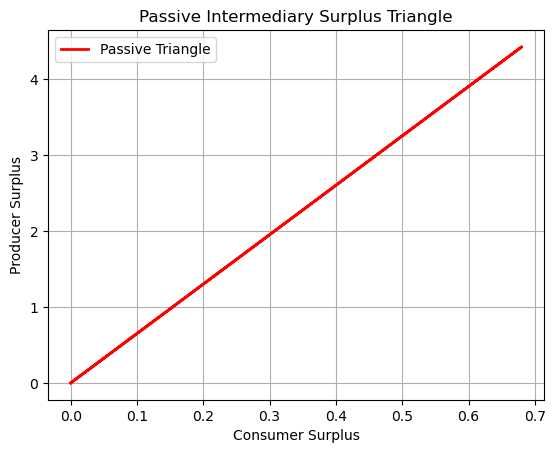

面积: 0.0
顶点: [(0.0, 0.0), (0.68, 4.42), (0.68, 4.42)]


In [2]:
from utils.triangle_utils import construct_passive_surplus_triangle
from utils.visualization import plot_theoretical_passive_triangle

values = [1, 4, 5, 10]
masses = [0.3, 0.2, 0.2, 0.3]
market = Market(values, masses)
F = [1, 4, 5, 10]

vertices, area = construct_passive_surplus_triangle(market, F)
if vertices:
    plot_theoretical_passive_triangle(vertices, label="Passive Triangle")
    print("面积:", area)
    print("顶点:", vertices)
else:
    print("该 F 下没有可行的三角形")
